In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from rubin_sim.scheduler.utils import Sky_area_generator, old_Sky_area_generator

In [2]:
sag = Sky_area_generator()

In [3]:
result, labels = sag.return_maps()

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

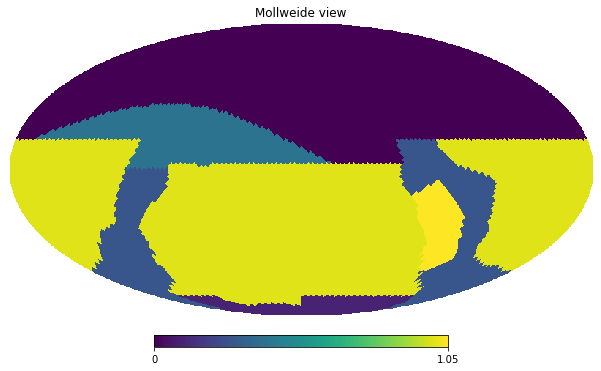

In [4]:
hp.mollview(result['r'])

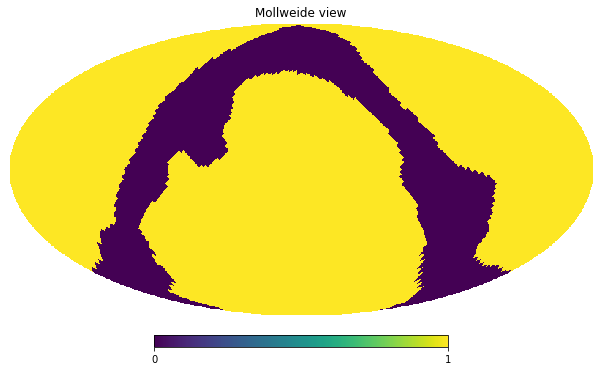

In [5]:
hp.mollview(sag.low_dust)

In [6]:
np.unique(labels)

array(['', 'LMC_SMC', 'bulge', 'dusty_plane', 'lowdust', 'nes', 'scp'],
      dtype='<U20')

In [7]:
osa = old_Sky_area_generator(nside=32)
osa.set_maps()
final_tot, footprints_hp = osa.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = osa.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

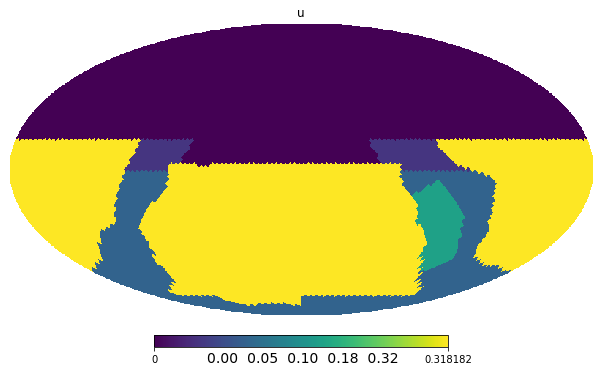

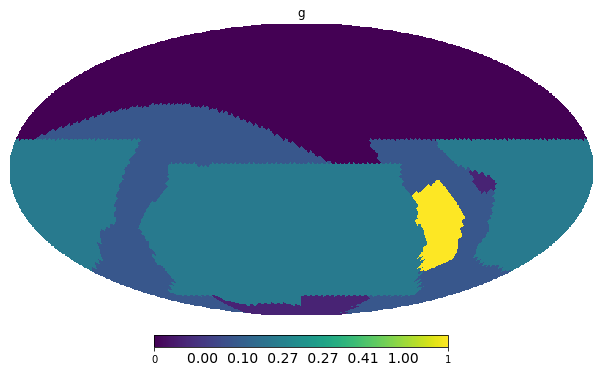

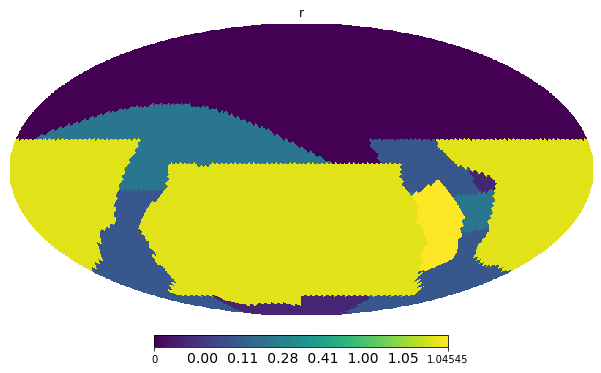

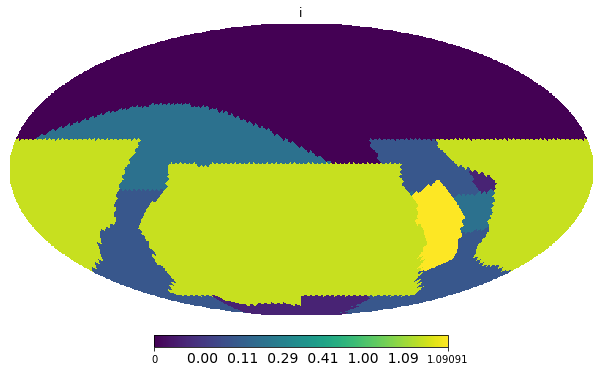

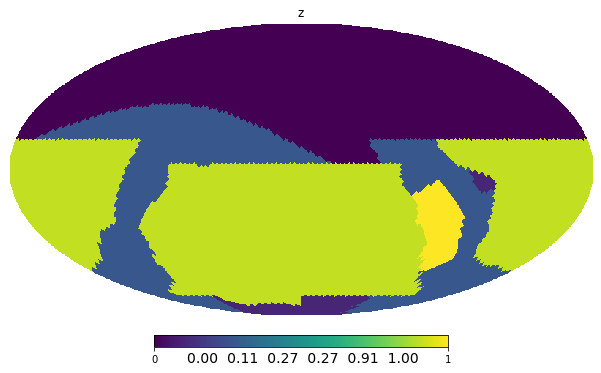

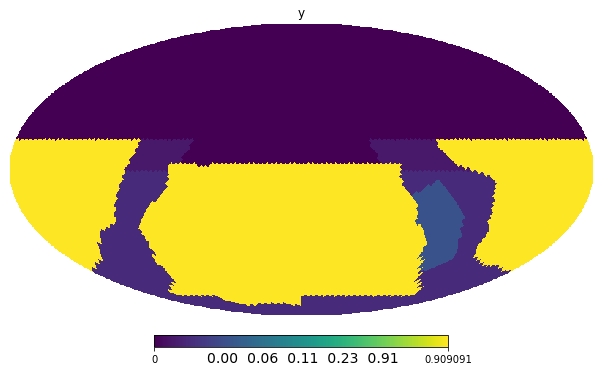

In [8]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(footprints_hp[key]):
        label += ' %0.2f ' % val
    hp.mollview(footprints_hp[key], unit=label, title=key)

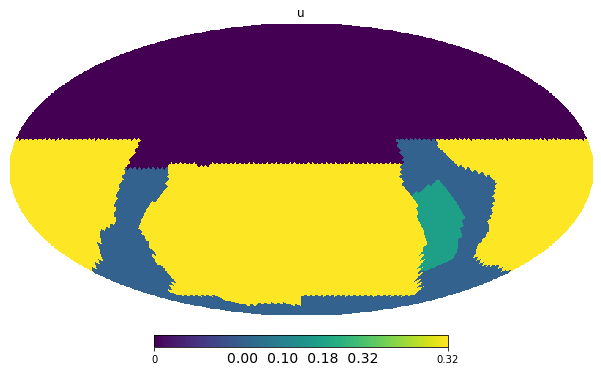

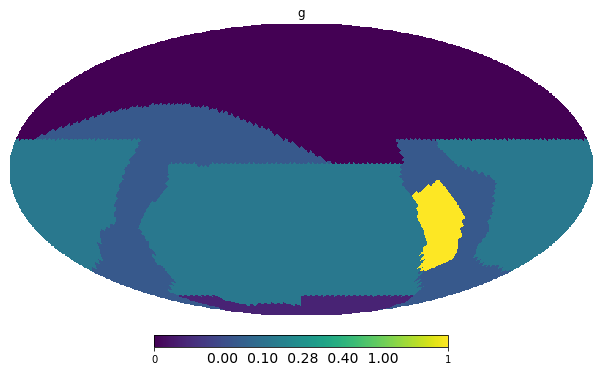

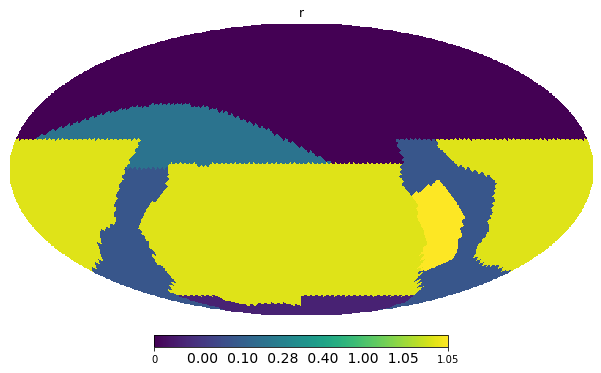

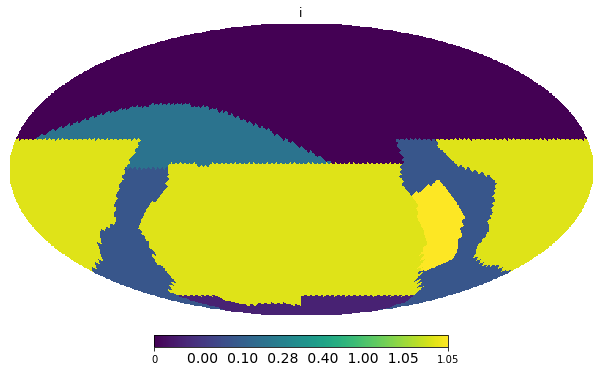

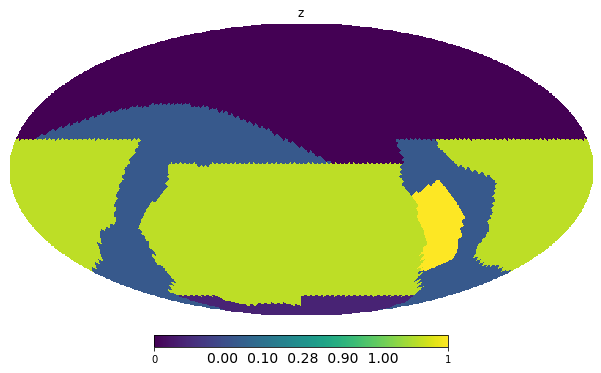

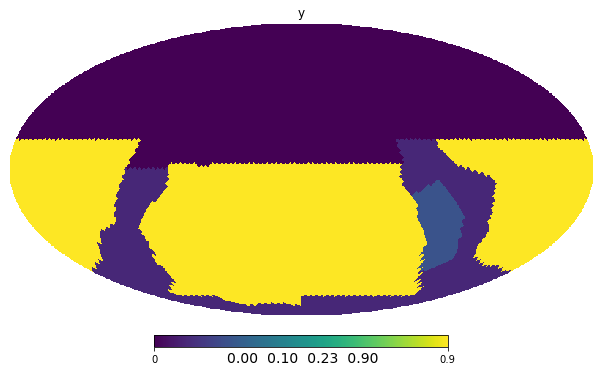

In [9]:
for key in 'ugrizy':
    
    label = ' '
    for val in np.unique(result[key]):
        label += ' %0.2f ' % val
    hp.mollview(result[key], unit=label, title=key)

In [10]:
for key in footprints_hp:
    print(key, footprints_hp[key][6818])

u 0.18181818181818182
g 1.0
r 1.0454545454545456
i 1.090909090909091
z 1.0
y 0.2272727272727273


In [11]:
indx = np.where(footprints_hp['r'] == 1)[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

u 0.31818181818181823
g 0.40909090909090906
r 1.0
i 1.0
z 0.9090909090909092
y 0.9090909090909092


In [12]:
np.unique(footprints_hp['r'])

array([0.        , 0.10782241, 0.2820296 , 0.40909091, 1.        ,
       1.04545455])

In [13]:
indx = np.where((footprints_hp['r'] > 0.2) & (footprints_hp['r'] < 0.4))[0].min()
for key in footprints_hp:
    print(key, footprints_hp[key][indx])

u 0.04904862579281185
g 0.26976744186046514
r 0.28202959830866814
i 0.2942917547568711
z 0.26976744186046514
y 0.06131078224101481


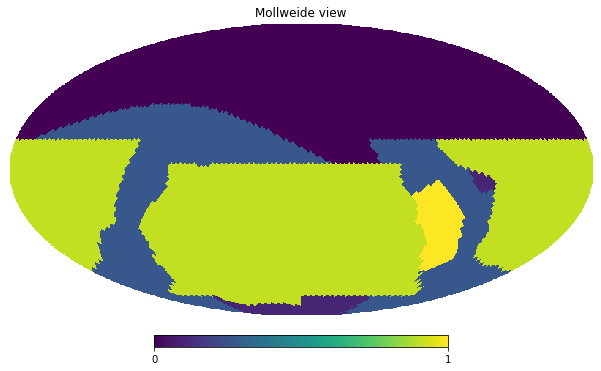

In [14]:
hp.mollview(footprints_hp['z'])

In [15]:
np.unique(footprints_hp['z'])

array([0.        , 0.10782241, 0.26976744, 0.27272727, 0.90909091,
       1.        ])

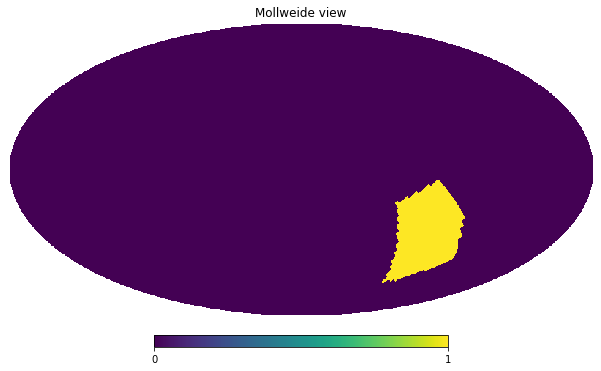

In [16]:
hp.mollview(osa.bulge)

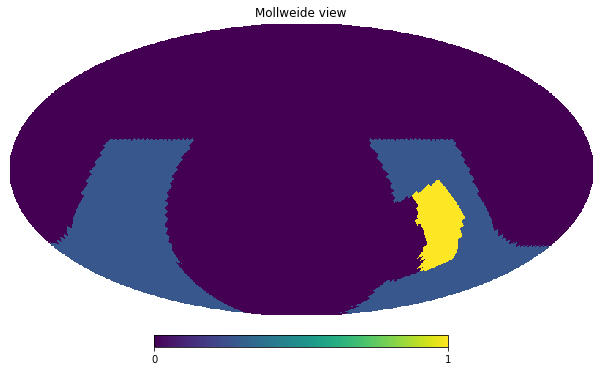

In [17]:
hp.mollview(osa.maps['gal'])

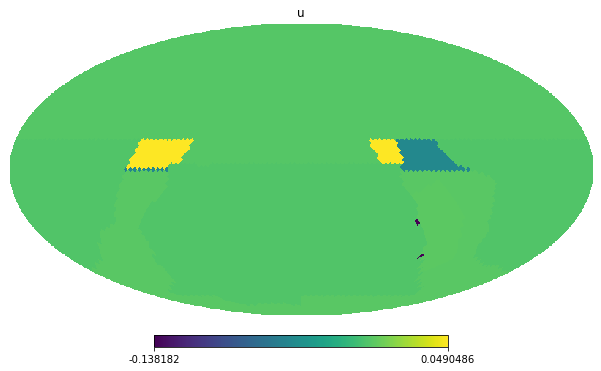

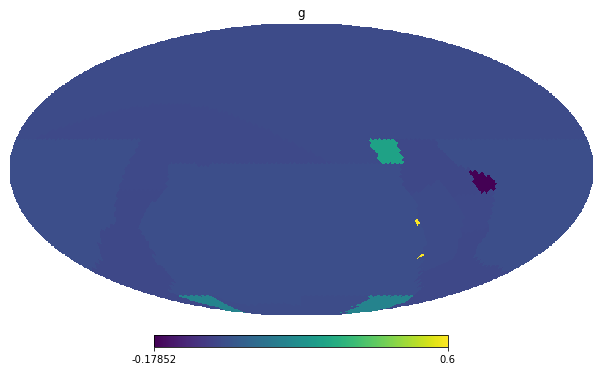

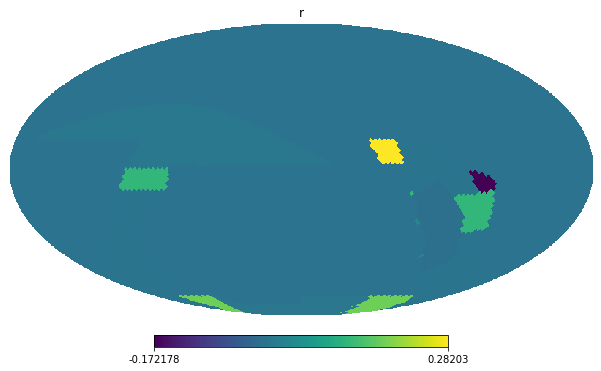

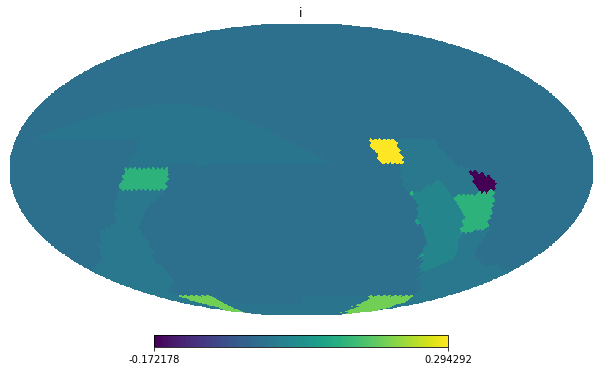

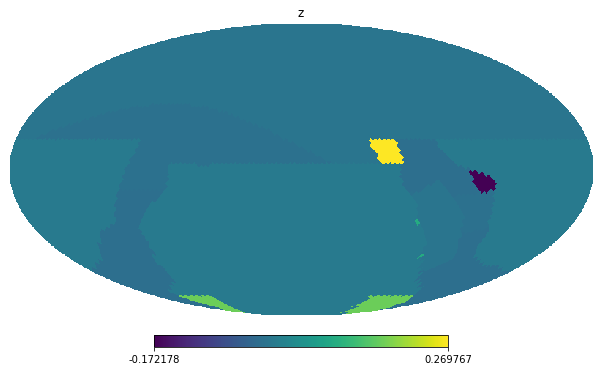

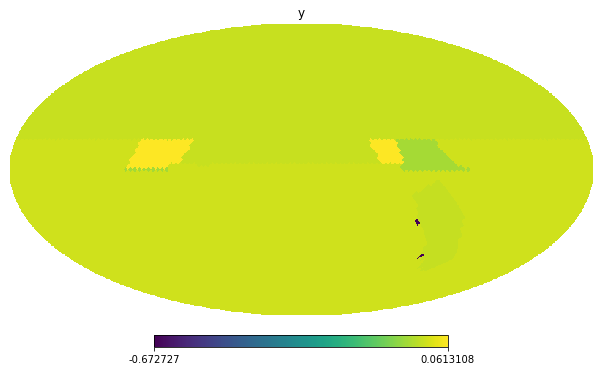

In [20]:
for filtername in 'ugrizy':
    hp.mollview(footprints_hp[filtername] - result[filtername], title=filtername)